# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in 0.1 m/s
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Louise Monteyne 32202000

Part. 2: Gabrielle Deplae 19082000

Part. 3: Albane Denis 23872000

Part. 4: Liza Denis 30902000

Part. 5: Maxime Devillet 08661900


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np

def cleanData(data ,minDate,maxDate):
    data = data[(data["    DATE"]>=minDate)&(data["    DATE"]<=maxDate)]
    return data

# open and read data
data_E = pd.read_csv("../database/Elsenborn.csv", sep = ',')
data_B = pd.read_csv("../database/Beauvechain.csv", sep = ',')

#select data from the 1/1/2017 to the 1/1/2021
minDate = 20170101
maxDate = 20210101
data_B = cleanData(data_B, minDate, maxDate)
data_E = cleanData(data_E, minDate, maxDate)

data_B = data_B.reset_index()
data_E = data_E.reset_index()

# remove all days with missing data
new_data_B = data_B[(data_B[" Q_FG"]==0)&(data_E[" Q_FG"]==0)]
data_E = data_E[(data_E[" Q_FG"]==0)&(data_B[" Q_FG"]==0)]
data_B= new_data_B

#récupère la vitesse du vent
data_B_FG = data_B["   FG"]
data_E_FG = data_E["   FG"]

#calcul de la puissance électrique
data_B_P = np.power(data_B_FG/3.6, 3)*0.5*1.2*np.pi*np.power(32,2)*(10**-6) *0.42*8
data_E_P = np.power(data_E_FG/3.6, 3)*0.5*1.2*np.pi*np.power(32,2)*(10**-6) *0.42*8

#mettre la production à 0 si la vitesse du vent >=90
data_B_P[data_B_FG>=90]=0
data_E_P[data_E_FG>=90]=0


Comment briefly your results



------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

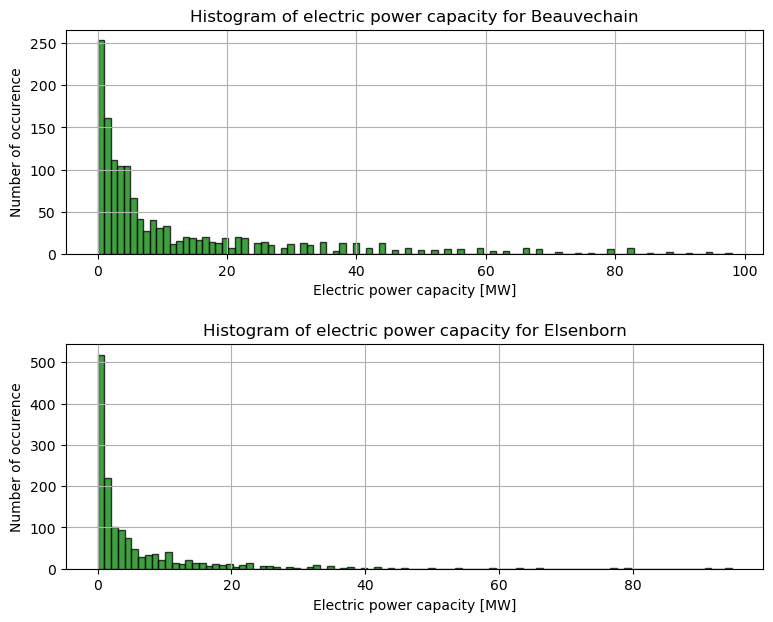

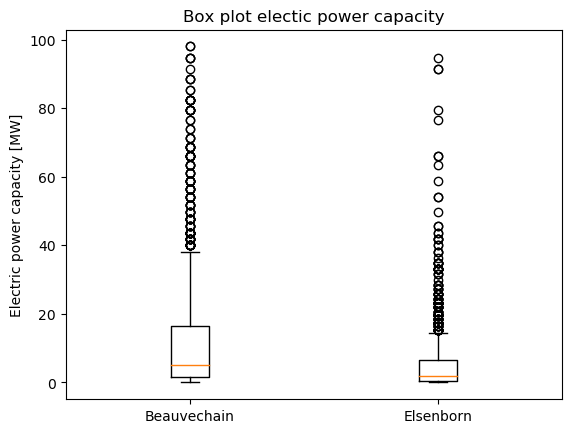

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.subplots_adjust(hspace=0.4)

#histogram for Beauvechain
plt.subplot(2,1,1)
biggest_B= int(data_B_P.max())
data_B_P.hist(bins= biggest_B,facecolor='g', edgecolor= 'black', alpha=0.75)
plt.xlabel('Electric power capacity [MW]')
plt.ylabel('Number of occurence')
plt.title('Histogram of electric power capacity for Beauvechain', fontsize=12)
plt.grid(True)

#histogram for Elsenborn
plt.subplot(2,1,2)
biggest_E= int(data_E_P.max())
data_E_P.hist(bins=biggest_E ,facecolor='g', edgecolor= 'black', alpha=0.75)
plt.xlabel('Electric power capacity [MW]')
plt.ylabel('Number of occurence')
plt.title('Histogram of electric power capacity for Elsenborn', fontsize=12)
plt.grid(True)
plt.show()

#box plots
plt.boxplot([data_B_P,data_E_P], labels=["Beauvechain","Elsenborn"])
plt.ylabel('Electric power capacity [MW]')
plt.title('Box plot electic power capacity')
plt.show()


------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [4]:
def average(data):
    # calcul la moyenne
    return data.mean()


def median(data):
    # calcul la médianne
    return data.median()


def sdDeviation(data):
    # calucl la variance
    return data.std()


def insidePercent(data, percentiles):
    # calcul le quantil (centil)
    return data.quantile(q=percentiles)

# dictionnaire contenant les résultats à afficher
data = {
    " ": ["Beauvechain", "Elsenborn", "both"],
    "average": [average(data_B_P), average(data_E_P), average(pd.concat([data_E_P, data_B_P]))],
    "median": [median(data_B_P), median(data_E_P), median(pd.concat([data_E_P, data_B_P]))],
    "deviation": [sdDeviation(data_B_P), sdDeviation(data_E_P), sdDeviation(pd.concat([data_E_P, data_B_P]))],
    "q = 95%": [insidePercent(data_B_P, 0.95), insidePercent(data_E_P, 0.95), insidePercent(pd.concat([data_E_P, data_B_P]),0.95)],
    "q = 5%": [insidePercent(data_B_P, 0.05), insidePercent(data_E_P, 0.05), insidePercent(pd.concat([data_E_P, data_B_P]),0.05)]
}

print(pd.DataFrame(data))


                  average    median  deviation    q = 95%    q = 5%
0  Beauvechain  12.600719  4.995451  17.837159  54.075611  0.240202
1    Elsenborn   5.650138  1.921616   9.765462  23.127086  0.101335
2         both   9.125429  3.051455  14.790978  39.963605  0.139006


Comment briefly your results




------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

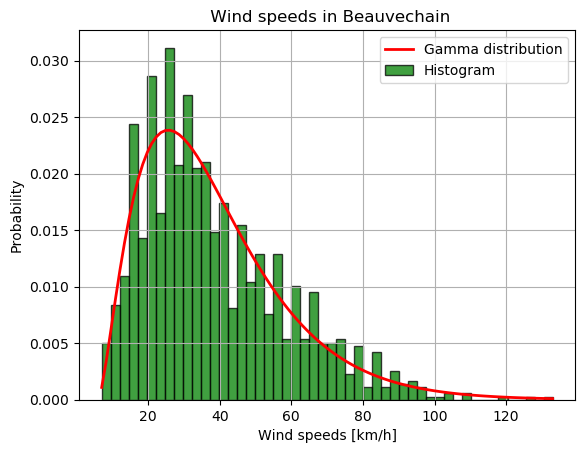

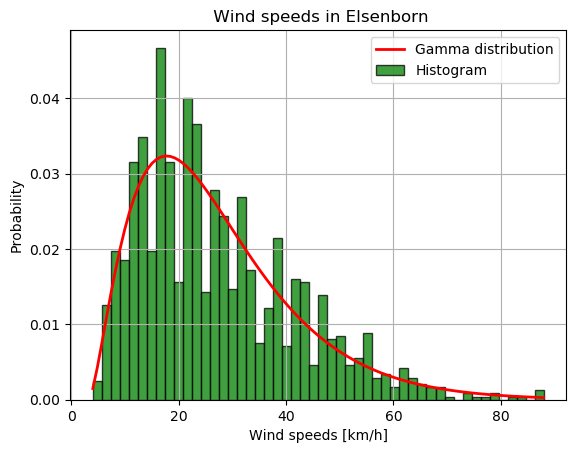

In [5]:
# Code here, gamma distribution
import scipy.stats as sc

a, loc, scale  = sc.gamma.fit(data=data_B_FG)


#histogram de beauvechain
plt.hist(data_B_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Beauvechain')
#pdf de beauvechain
x  = np.linspace(min(data_B_FG),max(data_B_FG),100)
fx = sc.gamma.pdf(x, a = a, scale= scale, loc =loc )
plt.plot(x,fx,'r',lw=2)
plt.grid(True)
plt.legend(['Gamma distribution','Histogram'])
plt.show()

a, loc, scale  = sc.gamma.fit(data=data_E_FG)

#histogram de Elsenborn
plt.hist(data_E_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Elsenborn')
#pdf de Elsenborn
x  = np.linspace(min(data_E_FG),max(data_E_FG),100)
fx = sc.gamma.pdf(x, a = a, scale= scale, loc = loc)
plt.plot(x,fx,'r',lw=2)
plt.grid(True)
plt.legend(['Gamma distribution','Histogram'])
plt.show()


Comment briefly your results



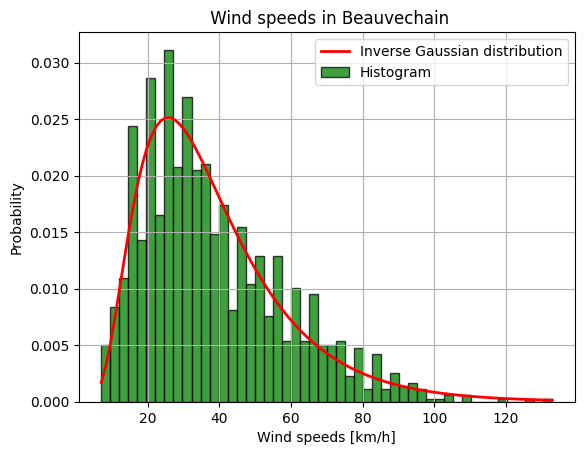

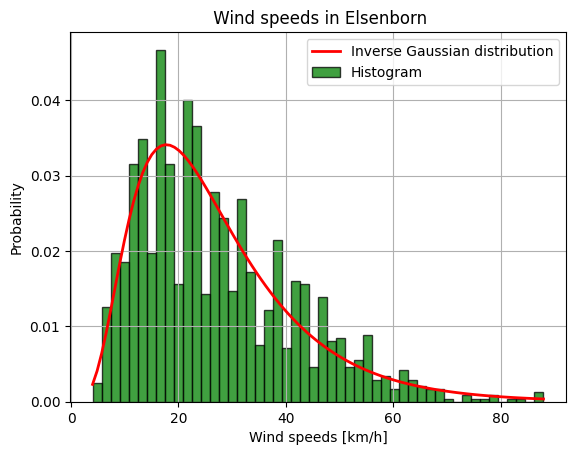

In [19]:
# Code here, inverse Gaussian
a, loc ,scale = sc.invgauss.fit(data=data_B_FG)


#histogram de beauvechain
plt.hist(data_B_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Beauvechain')
#pdf de beauvechain
x  = np.linspace(min(data_B_FG),max(data_B_FG),100)
fx = sc.invgauss.pdf(x, mu = a, scale= scale, loc =loc )
plt.plot(x,fx,'r',lw=2)
plt.grid(True)
plt.legend(['Inverse Gaussian distribution','Histogram'])
plt.show()

a, loc, scale  = sc.invgauss.fit(data=data_E_FG)

#histogram de Elsenborn
plt.hist(data_E_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Elsenborn')
#pdf de Elsenborn
x  = np.linspace(min(data_E_FG),max(data_E_FG),100)
fx = sc.invgauss.pdf(x, mu = a, scale= scale, loc = loc)
plt.plot(x,fx,'r',lw=2)
plt.grid(True)
plt.legend(['Inverse Gaussian distribution','Histogram'])
plt.show()

Comment briefly your results


------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [20]:
def num_average(data):
    # calcul la moyenne numériquement 
    return data.sum()/len(data)

def num_median(data):
    data = np.sort(data)
    return data[int((len(data)-1)/2)]

def num_sdDeviation(data):
    moyenne = num_average(data)
    result = np.square(data-moyenne)
    result = np.sum(result)/len(data)
    result = np.sqrt(result)
    return result

def num_insidePercent(data, percentiles):

    data = np.sort(data)
    return data[int((len(data)-1)*percentiles)]


data = {
    " ": ["Beauvechain", "Elsenborn", "both"],
    "average": [num_average(data_B_P), num_average(data_E_P), num_average(pd.concat([data_E_P, data_B_P]))],
    "median": [num_median(data_B_P), num_median(data_E_P), num_median(pd.concat([data_E_P, data_B_P]))],
    "Deviation": [num_sdDeviation(data_B_P), num_sdDeviation(data_E_P), num_sdDeviation(pd.concat([data_E_P, data_B_P]))],
    "q = 95%": [num_insidePercent(data_B_P, 0.95), num_insidePercent(data_E_P, 0.95), num_insidePercent(pd.concat([data_E_P, data_B_P]), 0.95)],
    "q = 5%": [num_insidePercent(data_B_P, 0.05), num_insidePercent(data_E_P, 0.05), num_insidePercent(pd.concat([data_E_P, data_B_P]), 0.05)]
}

print(pd.DataFrame(data))



                  average    median  Deviation    q = 95%    q = 5%
0  Beauvechain  12.600719  4.995451  17.830850  54.075611  0.240202
1    Elsenborn   5.650138  1.921616   9.762008  23.127086  0.101335
2         both   9.125429  3.051455  14.788362  39.963605  0.139006


Comment briefly your results



------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

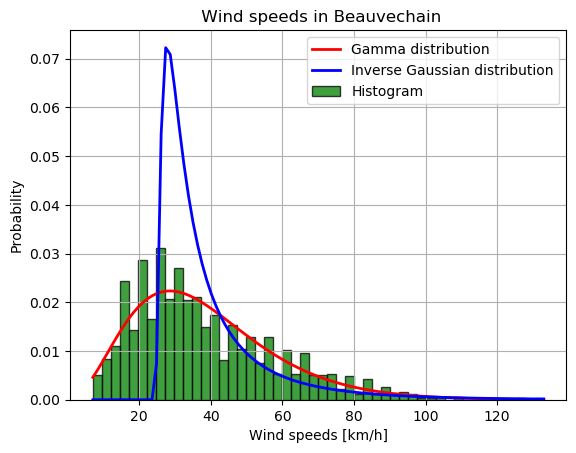

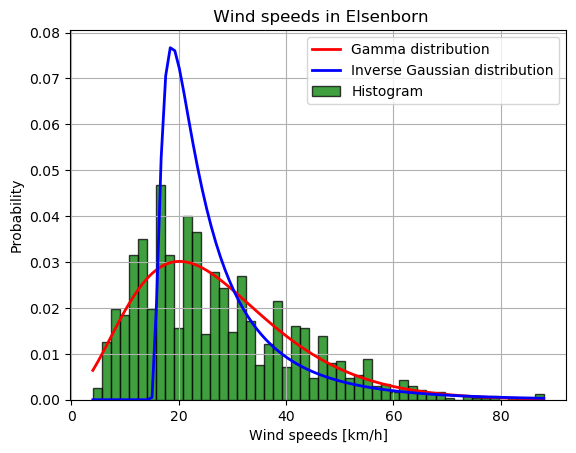

In [11]:
a, loc, scale = sc.gamma.fit(data=data_B_FG,method="MM")

#histogram de beauvechain
plt.hist(data_B_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Beauvechain')

#pdf de beauvechain 
#Gamma
x  = np.linspace(min(data_B_FG),max(data_B_FG),100)
fx=sc.gamma.pdf(x,a=a,scale=scale,loc=loc)
plt.plot(x,fx,'r',lw=2)

#Inverse Gaussian
a, loc ,scale = sc.invgauss.fit(data=data_B_FG,method="MM")
fx2=sc.invgauss.pdf(x,mu=a,scale=scale,loc=loc)
plt.plot(x,fx2,'b',lw=2)

plt.grid(True)
plt.legend(['Gamma distribution','Inverse Gaussian distribution','Histogram'])
plt.show()

a, loc, scale  = sc.gamma.fit(data=data_E_FG, method="MM")

#histogram de Elsenborn
plt.hist(data_E_FG, 50, density=1,facecolor='g', alpha=0.75, edgecolor= 'black')
plt.xlabel('Wind speeds [km/h]')
plt.ylabel('Probability')
plt.title(' Wind speeds in Elsenborn')
#pdf de Elsenborn
#Gamma
x  = np.linspace(min(data_E_FG),max(data_E_FG),100)
fx = sc.gamma.pdf(x, a = a, scale= scale, loc = loc)
plt.plot(x,fx,'r',lw=2)
#Inverse Gaussian
a, loc ,scale = sc.invgauss.fit(data=data_E_FG,method="MM")
fx3=sc.invgauss.pdf(x,mu=a,scale=scale,loc=loc)
plt.plot(x,fx3,'b',lw=2)

plt.grid(True)
plt.legend(['Gamma distribution','Inverse Gaussian distribution','Histogram'])
plt.show()



------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for both wind farms and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [44]:
#code here
import random as rn

a, loc, scale  = sc.gamma.fit(data=data_B_FG)
x  = np.linspace(min(data_B_FG),max(data_B_FG),100)
fx=sc.gamma.pdf(x,a=a,scale=scale,loc=loc)
data = rn.choices(population=fx, k=500)
data = (data,)
bootstrap_B = sc.bootstrap(data, np.median, n_resamples = 1000, confidence_level=0.95, random_state=1, method='percentile')
print(bootstrap_B.confidence_interval)


ConfidenceInterval(low=0.00248569691284858, high=0.0044009583114781635)


Comment briefly your results



------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results



In [160]:
# Code here

